# Black-Litterman Portfolio's Theory #

### Practical Example ###

In [239]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Optiminization
from scipy.optimize import minimize

# Pretty Notation
from IPython.display import display, Math

In [240]:
def import_financial_data(
    ticker: str
):

    # Check the ticker for Upper Cases
    ticker = ticker if ticker.isupper() else ticker.upper()

    # Import data
    df = pd.read_csv(rf"..\stocks\{ticker}.csv")

    # Set the Index
    df = df.set_index('Date')
    df.index = pd.to_datetime(df.index)

    df_useful_data = df[['Open Price', 'High Price', 'Low Price', 'Close Price', 'Adjusted_close', 'Company Market Cap']]

    df_useful_data = df_useful_data.rename(columns={
        "Open Price":"open",
        "High Price":"high",
        "Low Price":"low",
        "Close Price":"close",
        "Adjusted_close":"adjusted_close",
        "Company Market Cap":"mkt_cap"
    })

    # Drop NaN's
    df_useful_data.dropna(inplace = True)

    return df_useful_data.loc["2023-01-01":]

In [241]:
# Import Data

# Apple Data
df_1 = import_financial_data("AAPL")

# Amazon Data
df_2 =  import_financial_data("AMZN")

# Meta Data
df_3 =  import_financial_data("META")

# Microsoft Data
df_4 =  import_financial_data("MSFT")

In [242]:
# Create the joint dataframe
df_data = pd.DataFrame()

# Columns will be the Adjusted Close Price
df_data['AAPL'] = df_1['adjusted_close']
df_data['AMZN'] = df_2['adjusted_close']
df_data['META'] = df_3['adjusted_close']
df_data['MSFT'] = df_4['adjusted_close']

# Drop Missing Data
df_data = df_data.dropna()

df_returns = df_data.pct_change(1).mul(100)
df_returns = df_returns.apply(lambda x: x.fillna(x.mean()), axis=0)

df_returns

,AAPL,AMZN,META,MSFT
Date,,,,
2023-01-03,0.150429,0.193320,0.367615,0.133746
2023-01-04,1.031422,-0.792356,2.108385,-4.374322
2023-01-05,-1.060462,-2.372563,-0.337599,-2.963771
2023-01-06,3.679411,3.561116,2.426343,1.178534
2023-01-09,0.408888,1.486989,-0.423012,0.973636
...,...,...,...,...
2024-10-15,1.102464,0.079983,-0.702889,-0.095434
2024-10-16,-0.885183,-0.426235,-1.617002,-0.625687
2024-10-17,0.159634,0.342447,0.024272,0.144189


In [243]:
# Theoretically we could use the average as the expected returns (these are daily returns)
expected_returns = df_returns.mean() 

expected_returns

AAPL    0.150429
AMZN    0.193320
META    0.367615
MSFT    0.133746
dtype: float64

In [244]:
# The volatility is calculated with the standard deviations (also daily volatilities)
volat = df_returns.dropna().std() 

volat

AAPL    1.373808
AMZN    1.921024
META    2.461816
MSFT    1.424405
dtype: float64

In [245]:
# Covariance Matrix
cov_matrix = df_returns.dropna().cov()

cov_matrix

,AAPL,AMZN,META,MSFT
AAPL,1.887347,1.032741,1.260554,0.984085
AMZN,1.032741,3.690334,2.740851,1.663622
META,1.260554,2.740851,6.060539,1.903464
MSFT,0.984085,1.663622,1.903464,2.028931


In [246]:
# Create the Market Capitalization 
df_mktcap = pd.DataFrame()

df_mktcap['AAPL'] = df_1['mkt_cap']
df_mktcap['AMZN'] = df_2['mkt_cap']
df_mktcap['META'] = df_3['mkt_cap']
df_mktcap['MSFT'] = df_4['mkt_cap']

df_mktcap = df_mktcap.dropna()

df_mktcap

,AAPL,AMZN,META,MSFT
Date,,,,
2023-01-03,2.070268e+12,9.204485e+11,3.270929e+11,1.704246e+12
2023-01-04,2.113976e+12,9.739118e+11,3.339892e+11,1.755779e+12
2023-01-05,2.112709e+12,9.757553e+11,3.328617e+11,1.776184e+12
2023-01-06,2.134088e+12,1.004945e+12,3.409381e+11,1.781546e+12
2023-01-09,2.152775e+12,9.837441e+11,3.394958e+11,1.789886e+12
...,...,...,...,...
2024-10-15,3.586048e+12,1.991009e+12,1.483156e+12,3.178296e+12
2024-10-16,3.508507e+12,1.938636e+12,1.459173e+12,3.156662e+12
2024-10-17,3.505618e+12,1.956164e+12,1.459527e+12,3.157628e+12


In [247]:
# Create the Market Capitalization Weights

total_market_cap = df_mktcap.sum(axis=1)  # Horizontal Sum because we got a Time Series

df_mktcap_weights = df_mktcap.div(total_market_cap, axis = 0)

df_mktcap_weights

,AAPL,AMZN,META,MSFT
Date,,,,
2023-01-03,0.412235,0.183281,0.065131,0.339352
2023-01-04,0.408288,0.188099,0.064506,0.339107
2023-01-05,0.406485,0.187735,0.064043,0.341737
2023-01-06,0.405603,0.190999,0.064798,0.338599
2023-01-09,0.408814,0.186814,0.064471,0.339901
...,...,...,...,...
2024-10-15,0.350251,0.194463,0.144861,0.310426
2024-10-16,0.348655,0.192650,0.145004,0.313691
2024-10-17,0.347816,0.194084,0.144810,0.313290


In [248]:
# Let us use the last observations since the mean of the portfolio is calculated with the whole story

market_weights = df_mktcap_weights.iloc[-1]

market_weights

AAPL    0.349537
AMZN    0.194758
META    0.143321
MSFT    0.312385
Name: 2024-10-21 00:00:00, dtype: float64

In [249]:
# We can calculate or estimate the Risk Aversion Coefficient using market data, but let us assume it

risk_aversion = 3.0

In [250]:
# Compute implied equilibrium returns

pi = risk_aversion * cov_matrix @ market_weights

pi

AAPL    4.046726
AMZN    5.976636
META    7.312874
MSFT    4.723768
dtype: float64

In [251]:
# Tau adjustment (controls uncertainty of implied returns)
tau = 0.10

pi_adjusted = tau * pi

pi_adjusted

AAPL    0.404673
AMZN    0.597664
META    0.731287
MSFT    0.472377
dtype: float64

In [252]:
# P matrix: 1 view per asset (identity matrix)
P = np.identity(4)

# Q vector: our expected returns relative to the market
Q = np.array([0.01, 0.02, 0.05, 0.03])  # AAPL, AMZN, META, MSFT

In [253]:
# Diagonal Omega matrix: uncertainty of each view
# Often proportional to variance of the assets related to the views
Omega = np.diag(np.diag(P @ cov_matrix @ P.T)) * tau

Omega

array([[0.18873474, 0.        , 0.        , 0.        ],
       [0.        , 0.36903335, 0.        , 0.        ],
       [0.        , 0.        , 0.60605387, 0.        ],
       [0.        , 0.        , 0.        , 0.20289309]])

In [254]:
# Inverse Matrix

inv_tau_sigma = np.linalg.inv(tau * cov_matrix)
inv_omega = np.linalg.inv(Omega)

In [255]:
# Apply Black-Litterman formula

posterior_mean = np.linalg.inv(inv_tau_sigma + P.T @ inv_omega @ P) @ (inv_tau_sigma @ pi + P.T @ inv_omega @ Q)

posterior_mean

array([1.26898906, 1.65832864, 2.02434429, 1.36932885])

In [256]:
# Calculate the Optimal Weights

optimal_weights = np.linalg.inv(cov_matrix) @ (posterior_mean) / risk_aversion

# Normalize weights to sum to 1

optimal_weights /= np.sum(optimal_weights)

optimal_weights

array([0.42248471, 0.15537864, 0.11537141, 0.30676525])

In [257]:
# Calculate the Portfolio Returns and Variance

portfolio_returns = np.dot(optimal_weights, expected_returns)

portfolio_variance = np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights))

portfolio_volatility = np.sqrt(portfolio_variance)

print(f"Expected Portfolio Return: {portfolio_returns:.4f}")
print(f"Portfolio Variance: {portfolio_variance:.6f}")
print(f"Portfolio Volatility (Std Dev): {portfolio_volatility:.4f}")

Expected Portfolio Return: 0.1770
Portfolio Variance: 1.602724
Portfolio Volatility (Std Dev): 1.2660


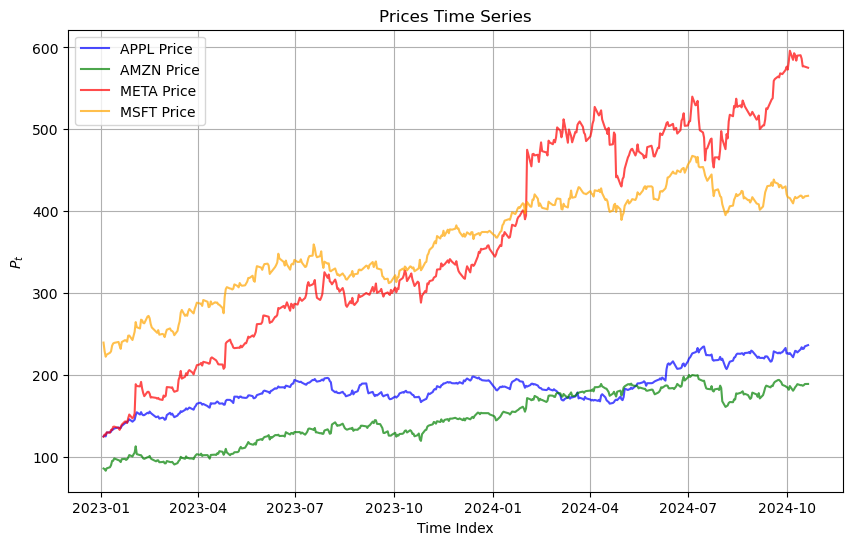

In [258]:
# Time Series Graphs
plt.figure(figsize=(10, 6))
plt.plot(df_data['AAPL'], label='APPL Price', color='blue', alpha=0.7)
plt.plot(df_data['AMZN'], label='AMZN Price', color='green', alpha=0.7)
plt.plot(df_data['META'], label='META Price', color='red', alpha=0.7)
plt.plot(df_data['MSFT'], label='MSFT Price', color='orange', alpha=0.7)

# Config
plt.title('Prices Time Series')
plt.xlabel('Time Index')
plt.ylabel('$P_t$')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [259]:
# Calculate the Historical Returns of the Portfolio

portfolio_returns = df_returns @ optimal_weights

portfolio_returns

Date
2023-01-03    0.177032
2023-01-04   -0.785998
2023-01-05   -1.764806
2023-01-06    2.749280
2023-01-09    0.653669
                ...   
2024-10-15    0.367833
2024-10-16   -0.818699
2024-10-17    0.167685
2024-10-18    0.736440
2024-10-21    0.291919
Length: 453, dtype: float64

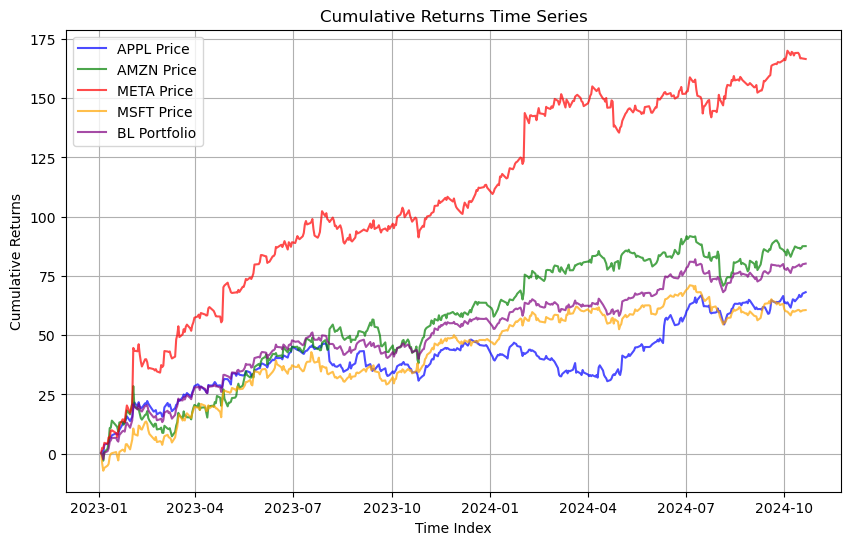

In [260]:
# Time Series Graphs
plt.figure(figsize=(10, 6))
plt.plot(df_returns['AAPL'].cumsum(), label='APPL Price', color='blue', alpha=0.7)
plt.plot(df_returns['AMZN'].cumsum(), label='AMZN Price', color='green', alpha=0.7)
plt.plot(df_returns['META'].cumsum(), label='META Price', color='red', alpha=0.7)
plt.plot(df_returns['MSFT'].cumsum(), label='MSFT Price', color='orange', alpha=0.7)
plt.plot(portfolio_returns.cumsum(), label='BL Portfolio', color='purple', alpha=0.7)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time Index')
plt.ylabel('Cumulative Returns')
plt.legend()

# Show
plt.grid(True)
plt.show()

In [261]:
def calculate_analytics(df_returns, risk_free_rate=0.0):
    # Trading Days in one Year
    ann_factor = 252  
    
    # Annualized Returns
    annualized_return = df_returns.mean() * ann_factor
    
    # Annualized Volatility
    annualized_std = df_returns.std() * np.sqrt(ann_factor)
    
    # Sharpe Ratio
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std
    
    # Max Drawdown
    cumulative_returns = (1 + df_returns.div(100)).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / rolling_max) - 1
    max_drawdown = drawdown.min()

    # VaR at 95%
    var_95 = df_returns.quantile(0.05)

    # Create DF
    summary_df = pd.DataFrame({
        "Annualized Returns": annualized_return,
        "Annualized Volatility": annualized_std,
        "Sharpe Ratio": sharpe_ratio,
        "Max Drawdown": max_drawdown,
        "VaR 95%": var_95
    })
    
    return summary_df

In [262]:
# Create the Analytics

df_returns['BL'] = portfolio_returns

df_returns

,AAPL,AMZN,META,MSFT,BL
Date,,,,,
2023-01-03,0.150429,0.193320,0.367615,0.133746,0.177032
2023-01-04,1.031422,-0.792356,2.108385,-4.374322,-0.785998
2023-01-05,-1.060462,-2.372563,-0.337599,-2.963771,-1.764806
2023-01-06,3.679411,3.561116,2.426343,1.178534,2.749280
2023-01-09,0.408888,1.486989,-0.423012,0.973636,0.653669
...,...,...,...,...,...
2024-10-15,1.102464,0.079983,-0.702889,-0.095434,0.367833
2024-10-16,-0.885183,-0.426235,-1.617002,-0.625687,-0.818699
2024-10-17,0.159634,0.342447,0.024272,0.144189,0.167685


In [263]:
# Now the table
analytics_table = calculate_analytics(df_returns)

analytics_table

,Annualized Returns,Annualized Volatility,Sharpe Ratio,Max Drawdown,VaR 95%
AAPL,37.907984,21.808520,1.738219,-0.167129,-2.026078
AMZN,48.716589,30.495312,1.597511,-0.196440,-2.630889
META,92.638922,39.080120,2.370487,-0.184264,-2.677549
MSFT,33.704047,22.611736,1.490556,-0.154868,-2.259407
BL,44.612174,20.096925,2.219851,-0.132057,-1.932785
